In [99]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, precision_score, recall_score, f1_score, r2_score
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Classification Data

In [2]:
df = pd.read_csv("WineQT.csv")
df.drop('Id',axis=1,inplace=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
X = df.drop(columns=['quality'])
y = df['quality']

y = np.array(y)

X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_wine, X_val_wine, y_train_wine, y_val_wine = train_test_split(X_train_wine, y_train_wine, test_size=0.2, random_state=42)

In [4]:
X_train_wine.fillna(X_train_wine.mean(), inplace=True)
X_val_wine.fillna(X_val_wine.mean(), inplace=True)
X_test_wine.fillna(X_test_wine.mean(), inplace=True)

std_scaler = StandardScaler()  
X_train_wine = std_scaler.fit_transform(X_train_wine)
X_val_wine = std_scaler.transform(X_val_wine)
X_test_wine = std_scaler.transform(X_test_wine)

In [5]:
y_train_wine[np.isin(y_train_wine, [3, 4, 5])] = 0
y_train_wine[np.isin(y_train_wine, [6, 7, 8])] = 1
y_val_wine[np.isin(y_val_wine, [3, 4, 5])] = 0
y_val_wine[np.isin(y_val_wine, [6, 7, 8])] = 1
y_test_wine[np.isin(y_test_wine, [3, 4, 5])] = 0
y_test_wine[np.isin(y_test_wine, [6, 7, 8])] = 1

## Regression Data

In [6]:
df = pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [7]:
X = df.drop(columns=['MEDV'])
y = df['MEDV']

y = np.array(y)

X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_housing, X_val_housing, y_train_housing, y_val_housing = train_test_split(X_train_housing, y_train_housing, test_size=0.2, random_state=42)

In [8]:
X_train_housing.fillna(X_train_housing.mean(), inplace=True)
X_val_housing.fillna(X_val_housing.mean(), inplace=True)
X_test_housing.fillna(X_test_housing.mean(), inplace=True)

std_scaler = StandardScaler()  
X_train_housing = std_scaler.fit_transform(X_train_housing)
X_val_housing = std_scaler.transform(X_val_housing)
X_test_housing = std_scaler.transform(X_test_housing)

y_train_housing = y_train_housing.reshape(-1,1)
y_test_housing = y_test_housing.reshape(-1,1)
y_val_housing = y_val_housing.reshape(-1,1)

In [107]:
class RandomForestClassifier:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.estimators = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            tree = DecisionTreeClassifier(max_depth=self.max_depth,
                                          min_samples_split=self.min_samples_split,
                                          min_samples_leaf=self.min_samples_leaf)
            
            sample_indices = np.random.choice(len(X), len(X), replace=False)
            X_sampled = X[sample_indices]
            y_sampled = y[sample_indices]

            tree.fit(X_sampled, y_sampled)
            
            self.estimators.append(tree)

    def predict(self, X):
        predictions = [tree.predict(X) for tree in self.estimators]
        return np.round(np.mean(predictions, axis=0).astype(int))
    
    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)
    
    def set_params(self, n_estimators):
        self.n_estimators = n_estimators
        self.estimators = []

    def calculate_feature_importance(self, X, y):
        feature_importance = np.zeros(X.shape[1])
        for tree in self.estimators:
            feature_importance += tree.feature_importances_
        return feature_importance / len(self.estimators)

rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=10)
rf_classifier.fit(X_train_wine, y_train_wine)
y_pred = rf_classifier.predict(X_test_wine)
accuracy = rf_classifier.accuracy(X_test_wine, y_test_wine)
print(accuracy)

0.7030567685589519


In [18]:
# Define ranges for hyperparameters
n_estimators_values = [100, 150, 200]
max_depth_values = [5, 10, 15]
min_samples_split_values = [2, 5, 10]
min_samples_leaf_values = [1, 2, 4]

best_accuracy = 0
best_params = {}
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        for min_samples_split in min_samples_split_values:
            for min_samples_leaf in min_samples_leaf_values:
                rf_classifier = RandomForestClassifier(n_estimators=n_estimators, 
                                                       max_depth=max_depth, 
                                                       min_samples_split=min_samples_split, 
                                                       min_samples_leaf=min_samples_leaf)
                rf_classifier.fit(X_train_wine, y_train_wine)
                accuracy = rf_classifier.accuracy(X_test_wine, y_test_wine)
                
                # Check if current parameters give better accuracy
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {
                        'n_estimators': n_estimators,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf
                    }

print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_params)

Best Accuracy: 0.7729257641921398
Best Parameters: {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 2}


In [134]:
class RandomForestRegression:
    def __init__(self, n_estimators=100, max_depth=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            sample_indices = np.random.choice(len(X), len(X), replace=True)
            X_sampled = X[sample_indices]
            y_sampled = y[sample_indices]

            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X_sampled, y_sampled)
            self.trees.append(tree)

    def predict(self, X):
        predictions = [tree.predict(X) for tree in self.trees]
        return np.mean(predictions, axis=0)

    def calculate_mse(self, X, y):
        return mean_squared_error(y, self.predict(X))

    def calculate_r_squared(self, X, y):
        return r2_score(y, self.predict(X))
    
    def set_params(self, n_estimators):
        self.n_estimators = n_estimators
        self.trees = []

    def get_feature_importance(self, X, y):
        feature_importances = np.zeros(X.shape[1])
        for tree in self.trees:
            feature_importances += tree.feature_importances_

        feature_importances
        return feature_importances

rf = RandomForestRegression(n_estimators=100, max_depth=3)
rf.fit(X_train_housing, y_train_housing)
predictions = rf.predict(X_test_housing)
print(rf.calculate_mse(X_test_housing, y_test_housing))

18.276770159697648


In [59]:
# Define ranges for hyperparameters
n_estimators_values = [50, 100, 150]
max_depth_values = [3, 5, 7]

best_mse = float('inf')
best_params = {}

# Iterate through all combinations of hyperparameters
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        # Train the model with current hyperparameters
        rf = RandomForestRegression(n_estimators=n_estimators, max_depth=max_depth)
        rf.fit(X_train_housing, y_train_housing)
        
        # Evaluate the model using MSE
        mse = rf.calculate_mse(X_test_housing, y_test_housing)
        
        # Check if current parameters give better MSE
        if mse < best_mse:
            best_mse = mse
            best_params = {
                'n_estimators': n_estimators,
                'max_depth': max_depth
            }

print("Best MSE:", best_mse)
print("Best Parameters:", best_params)

Best MSE: 12.719226065892643
Best Parameters: {'n_estimators': 50, 'max_depth': 5}


In [116]:
class AdaBoostClassifierMulticlass:
    def __init__(self, n_estimators):
        self.n_estimators = n_estimators
        self.estimators = []
        self.errors = []
        self.estimator_weights = []

    def fit(self, X, y):
        sample_weights = np.ones(len(X)) / len(X)

        for i in range(self.n_estimators):
            estimator = DecisionTreeClassifier(random_state=42,max_depth=5)
            estimator.fit(X, y, sample_weight=sample_weights)
            y_pred = estimator.predict(X)
            err = np.sum(sample_weights * (y_pred != y)) / np.sum(sample_weights)
            self.errors.append(err)
            estimator_weight = np.log((1 - err) / max(err, 1e-10))
            self.estimator_weights.append(estimator_weight)
            self.estimators.append(estimator)
            sample_weights *= np.exp(estimator_weight * (y_pred != y))
            sample_weights /= np.sum(sample_weights)
    
    def predict(self, X):
        outputs = np.zeros((2, len(X)))

        for i, estimator in enumerate(self.estimators):
            y_pred = estimator.predict(X)
            for i in range(2):
                outputs[i] += self.estimator_weights[i] * (y_pred == i)

        final_predictions = np.argmax(outputs, axis=0)
        return final_predictions

    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y == y_pred)
    
    def set_params(self, n_estimators):
        self.n_estimators = n_estimators
        self.estimators = []
        self.errors = []

    def calculate_feature_importance(self):
        num_features = 11
        feature_importance = np.zeros(num_features)
        for i, estimator in enumerate(self.estimators):
            feature_importance += estimator.feature_importances_ * self.estimator_weights[i]

        feature_importance /= np.sum(feature_importance)
        return feature_importance

adaboost = AdaBoostClassifierMulticlass(n_estimators=5)
adaboost.fit(X_train_wine, y_train_wine)
y_pred = adaboost.predict(X_test_wine)
print(adaboost.accuracy(X_test_wine,y_test_wine))

0.7467248908296943


In [95]:
# ChatGPT: Asked to tune class Adaboost Classifier

n_estimators_values = [5, 10, 15, 20]

best_accuracy = 0
best_n_estimators = None

for n_estimators in n_estimators_values:
    adaboost = AdaBoostClassifierMulticlass(n_estimators=n_estimators)
    adaboost.fit(X_train_wine, y_train_wine)
    accuracy = adaboost.accuracy(X_test_wine, y_test_wine)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n_estimators

print("Best Accuracy:", best_accuracy)
print("Best n_estimators:", best_n_estimators)

Best Accuracy: 0.7510917030567685
Best n_estimators: 15


In [128]:
class AdaBoostRegressor:
    def __init__(self, n_estimators):
        self.n_estimators = n_estimators
        self.estimators = []
        self.classes = None
        self.betas = []

    # ChatGPT code for weighted_median: Write code for weighted_mean which takes data and weights as input
    def weighted_median(self, data, weights):
        combined = list(zip(data, weights))
        combined.sort(key=lambda x: x[0])

        total_weight = sum(weights)
        cumulative_weight = 0.0

        for value, weight in combined:
            cumulative_weight += weight
            if cumulative_weight >= total_weight / 2.0:
                return value

        return None

    def fit(self, X, y):
        N = len(X)
        sample_weights = [1/N] * N
        betas = []
        for i in range(self.n_estimators):
            regressor = DecisionTreeRegressor(random_state=42,max_depth=10)
            regressor.fit(X, y, sample_weight=sample_weights)
            y_pred = regressor.predict(X)
            y = y.ravel()
            
            e_t = np.abs(y-y_pred) / np.max(np.abs(y-y_pred))
            
            epsilon = np.sum(sample_weights*e_t)

            self.estimators.append(regressor)

            if epsilon >= 0.5:
                self.n_estimators = i - 1
                self.estimators = self.estimators[:i-1]
                break

            beta_t = epsilon/(1 - epsilon)
            betas.append(beta_t)
            
            sample_weights *= (beta_t**(1-e_t))/ np.sum(sample_weights*beta_t**(1-e_t))
                
        self.model_weights = np.log(1/np.array(betas))
        
    def predict(self, X_test):
        N_test = len(X_test)
        fitted_values = np.empty((N_test, self.n_estimators))
        for t, tree in enumerate(self.estimators):
            fitted_values[:,t] = tree.predict(X_test)
        return np.array([self.weighted_median(fitted_values[n], self.model_weights) for n in range(N_test)])
    
    def set_params(self, n_estimators):
        self.n_estimators = n_estimators
        self.estimators = []
        self.classes = None

    def get_feature_importance(self):
        feature_importances = np.zeros(X.shape[1])
        for tree in self.estimators:
            feature_importances += tree.feature_importances_

        feature_importances /= np.sum(feature_importances)
        return feature_importances

In [63]:
booster = AdaBoostRegressor(100)
booster.fit(X_train_housing, y_train_housing)

output = booster.predict(X_test_housing)
y_test_housing = y_test_housing.ravel()
print(r2_score(y_test_housing, output))
print(mean_squared_error(y_test_housing, output))

0.7873055699910511
15.597687209684752


In [64]:
# ChatGPT: Asked to tune class Adaboost Regressor

n_estimators_values = [5, 10, 15, 20]

best_mse = float('inf')
best_n_estimators = None

for n_estimators in n_estimators_values:
    adaboost = AdaBoostRegressor(n_estimators=n_estimators)
    adaboost.fit(X_train_housing, y_train_housing)
    predictions = adaboost.predict(X_val_housing)
    mse = mean_squared_error(y_val_housing, predictions)
    
    if mse < best_mse:
        best_mse = mse
        best_n_estimators = n_estimators

print("Best MSE:", best_mse)
print("Best n_estimators:", best_n_estimators)

Best MSE: 18.306322489179742
Best n_estimators: 20


In [125]:
class GradientBoostingClassifier:
    def __init__(self, n_estimators, learning_rate):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.estimators = []
    
    # Took help from ChatGPT to get to know how to access tree params
    def fit(self, X, y):
        self.mean = np.mean(y)
        prob_y_1 = np.mean(y)
        log_odds = np.repeat(np.log(prob_y_1 / (1 - prob_y_1)), len(X))
        log_odds = log_odds.ravel()
        prob = log_odds / (1 + log_odds)
        residuals = y - prob
        for i in range(self.n_estimators):
            tree = DecisionTreeRegressor(max_depth=3)
            tree.fit(X, residuals)
            self.estimators.append(tree)
            leaf_node_indices = tree.apply(X)
            leaf_nodes = [i for i in range(tree.tree_.node_count) if tree.tree_.children_left[i] == tree.tree_.children_right[i] == -1]
            updated_values = {}
            for index in leaf_nodes:
                probabs = 0
                for i in leaf_node_indices:
                    probabs += prob[i]*(1-prob[i])
                updated_values[index] = (tree.tree_.value[index][0][0]) / probabs
            for i, index in enumerate(leaf_node_indices):
                log_odds[i] = log_odds[i] + self.learning_rate * updated_values[index]
            
            prob = log_odds / (1 + log_odds)
            residuals = y - prob
    
    def predict(self, X):
        output = np.repeat(self.mean, len(X))
        output = np.log(output / (1-output))
        for tree in self.estimators:
            y_pred = tree.predict(X)
            output += self.learning_rate * y_pred
        
        output = (output>=0.5)
        return output
    
    def set_params(self, n_estimators):
        self.n_estimators = n_estimators
        self.estimators = []

    def calculate_feature_importance(self, X):
        feature_importances = np.zeros(X.shape[1])
        for tree in self.estimators:
            feature_importances += tree.feature_importances_
        
        feature_importances /= np.sum(feature_importances)
        return feature_importances

In [52]:
booster = GradientBoostingClassifier(100, 0.01)
booster.fit(X_train_wine, y_train_wine)
y_pred = booster.predict(X_test_wine)

accuracy_score(y_test_wine, y_pred)

0.7379912663755459

In [30]:
# ChatGPT: Asked to tune class GradientBoosting Classifier

n_estimators_values = [50, 100, 150]
learning_rate_values = [0.01, 0.1, 0.5]

best_accuracy = 0
best_params = {}

for n_estimators in n_estimators_values:
    for learning_rate in learning_rate_values:
        gradient_boost = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate)
        gradient_boost.fit(X_train_wine, y_train_wine)
        predictions = gradient_boost.predict(X_val_wine)
        accuracy = accuracy_score(y_val_wine, predictions)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {
                'n_estimators': n_estimators,
                'learning_rate': learning_rate
            }

print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_params)

Best Accuracy: 0.7213114754098361
Best Parameters: {'n_estimators': 100, 'learning_rate': 0.01}


In [132]:
class GradientBoostingRegressor:
    def __init__(self, n_estimators, learning_rate):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.estimators = []

    def fit(self, X, y):
        y = y.ravel()
        self.mean = np.mean(y)
        y_new = y - np.mean(y)
        output = np.repeat(np.mean(y), len(X))
        for i in range(self.n_estimators):
            tree = DecisionTreeRegressor(max_leaf_nodes=10)
            tree.fit(X, y_new) 
            self.estimators.append(tree)
            output = output + self.learning_rate * tree.predict(X)
            y_new = y - output

    def predict(self, X_test):
        output = np.repeat(self.mean, len(X_test))
        for tree in self.estimators:
            y_pred = tree.predict(X_test)
            output += self.learning_rate * y_pred

        return output
    
    def set_params(self, n_estimators):
        self.n_estimators = n_estimators
        self.estimators = []
    
    def mse(self, X, y):
        return mean_squared_error(y, self.predict(X))
    
    def get_feature_importance(self, X):
        feature_importances = np.zeros(X.shape[1])
        for tree in self.estimators:
            feature_importances += tree.feature_importances_

        feature_importances /= np.sum(feature_importances)
        return feature_importances

In [17]:
# ChatGPT: Asked to tune class GradientBoosting Regressor

booster = GradientBoostingRegressor(200, 0.01)
booster.fit(X_train_housing, y_train_housing)

output = booster.predict(X_test_housing)
y_test_housing = y_test_housing.ravel()
print(mean_squared_error(y_test_housing, output))

12.72536734809342


In [31]:
n_estimators_values = [50, 100, 150]
learning_rate_values = [0.01, 0.1, 0.5]

best_mse = float('inf')
best_params = {}

for n_estimators in n_estimators_values:
    for learning_rate in learning_rate_values:
        gradient_boost = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate)
        gradient_boost.fit(X_train_housing, y_train_housing)
        mse = gradient_boost.mse(X_val_housing, y_val_housing)
        
        if mse < best_mse:
            best_mse = mse
            best_params = {
                'n_estimators': n_estimators,
                'learning_rate': learning_rate
            }

print("Best MSE:", best_mse)
print("Best Parameters:", best_params)

Best MSE: 14.332879461739465
Best Parameters: {'n_estimators': 100, 'learning_rate': 0.1}


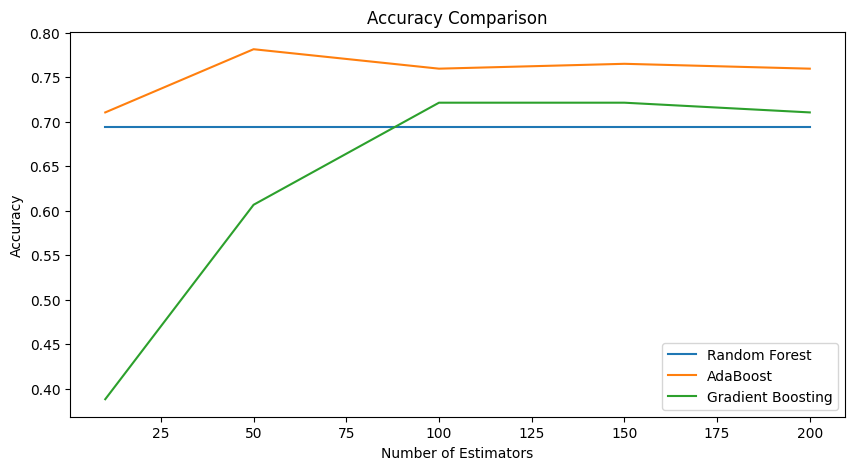

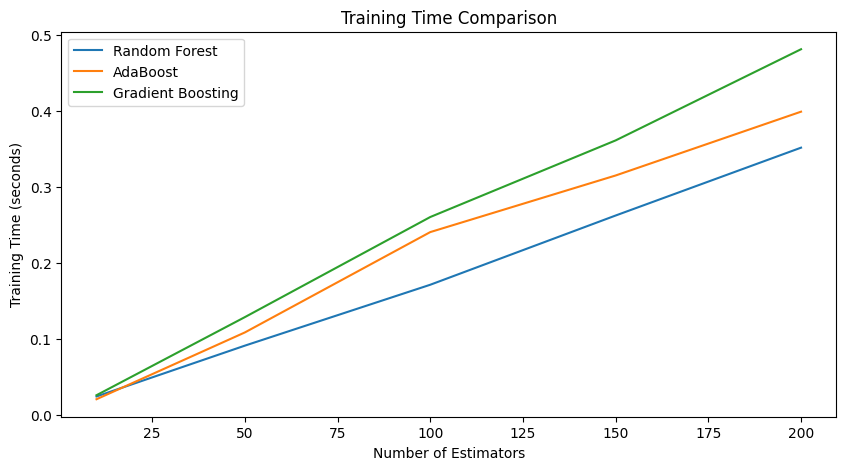

In [96]:
# ChatGPT Code: Write time and accuracy analysis for Gradient Boosting, Adaboost and Random Forest classifiers

# Prepare the models
random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=2)
adaboost = AdaBoostClassifierMulticlass(n_estimators=n_estimators)
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01)

models = [random_forest, adaboost, gradient_boosting]
model_names = ['Random Forest', 'AdaBoost', 'Gradient Boosting']

# Experiment with different numbers of estimators
num_estimators = [10, 50, 100, 150, 200]
results = {'accuracies': [], 'training_times': []}

for model in models:
    accuracies = []
    training_times = []

    for n_estimators in num_estimators:
        model.set_params(n_estimators=n_estimators)
        start_time = time.time()
        # Train the model
        model.fit(X_train_wine, y_train_wine)
        predictions = model.predict(X_val_wine)
        accuracy = accuracy_score(y_val_wine, predictions)
        end_time = time.time()

        # Store results
        accuracies.append(accuracy)
        training_times.append(end_time - start_time)

    results['accuracies'].append(accuracies)
    results['training_times'].append(training_times)

# Plotting accuracies
plt.figure(figsize=(10, 5))
for idx, name in enumerate(model_names):
    plt.plot(num_estimators, results['accuracies'][idx], label=name)

plt.title('Accuracy Comparison')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting training times
plt.figure(figsize=(10, 5))
for idx, name in enumerate(model_names):
    plt.plot(num_estimators, results['training_times'][idx], label=name)

plt.title('Training Time Comparison')
plt.xlabel('Number of Estimators')
plt.ylabel('Training Time (seconds)')
plt.legend()
plt.show()

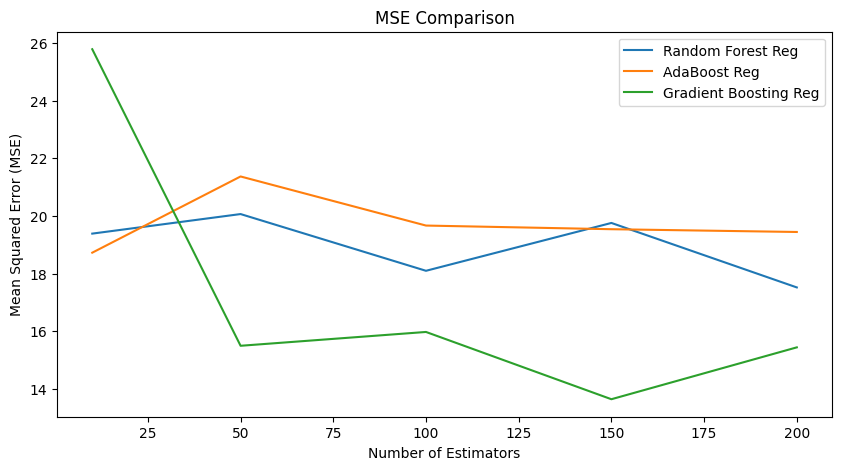

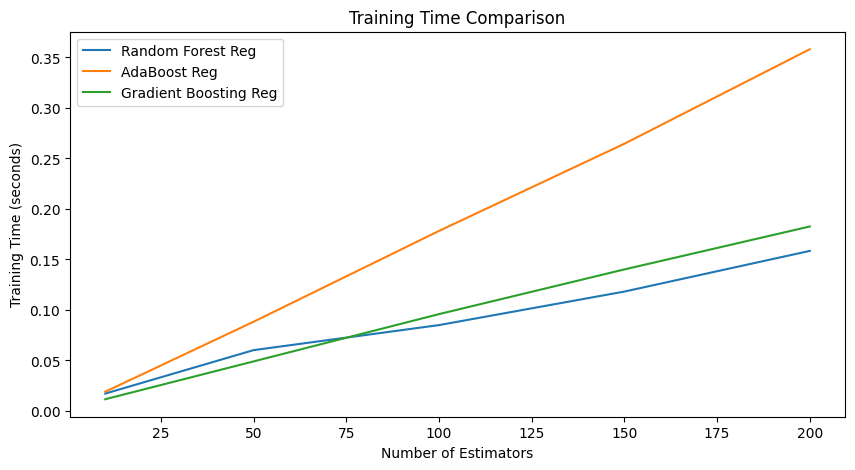

In [72]:
# ChatGPT Code: Write time and accuracy analysis for Gradient Boosting, Adaboost and Random Forest regressors

# Prepare the models
random_forest_reg = RandomForestRegression(n_estimators=50, max_depth=5)
adaboost_reg = AdaBoostRegressor(n_estimators=100)
gradient_boosting_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)

models_reg = [random_forest_reg, adaboost_reg, gradient_boosting_reg]
model_names_reg = ['Random Forest Reg', 'AdaBoost Reg', 'Gradient Boosting Reg']

# Experiment with different numbers of estimators
num_estimators = [10, 50, 100, 150, 200]
results_reg = {'mse': [], 'training_times': []}

for model_reg in models_reg:
    mses = []
    training_times = []

    for n_estimators in num_estimators:
        model_reg.set_params(n_estimators=n_estimators)
        start_time = time.time()
        # Train the model
        model_reg.fit(X_train_housing, y_train_housing)  # Replace with your training data
        predictions = model_reg.predict(X_val_housing)  # Replace with your validation data
        mse = mean_squared_error(y_val_housing, predictions)  # Calculate mean squared error
        end_time = time.time()

        # Store results
        mses.append(mse)
        training_times.append(end_time - start_time)

    results_reg['mse'].append(mses)
    results_reg['training_times'].append(training_times)

# Plotting MSEs
plt.figure(figsize=(10, 5))
for idx, name in enumerate(model_names_reg):
    plt.plot(num_estimators, results_reg['mse'][idx], label=name)

plt.title('MSE Comparison')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

# Plotting training times
plt.figure(figsize=(10, 5))
for idx, name in enumerate(model_names_reg):
    plt.plot(num_estimators, results_reg['training_times'][idx], label=name)

plt.title('Training Time Comparison')
plt.xlabel('Number of Estimators')
plt.ylabel('Training Time (seconds)')
plt.legend()
plt.show()

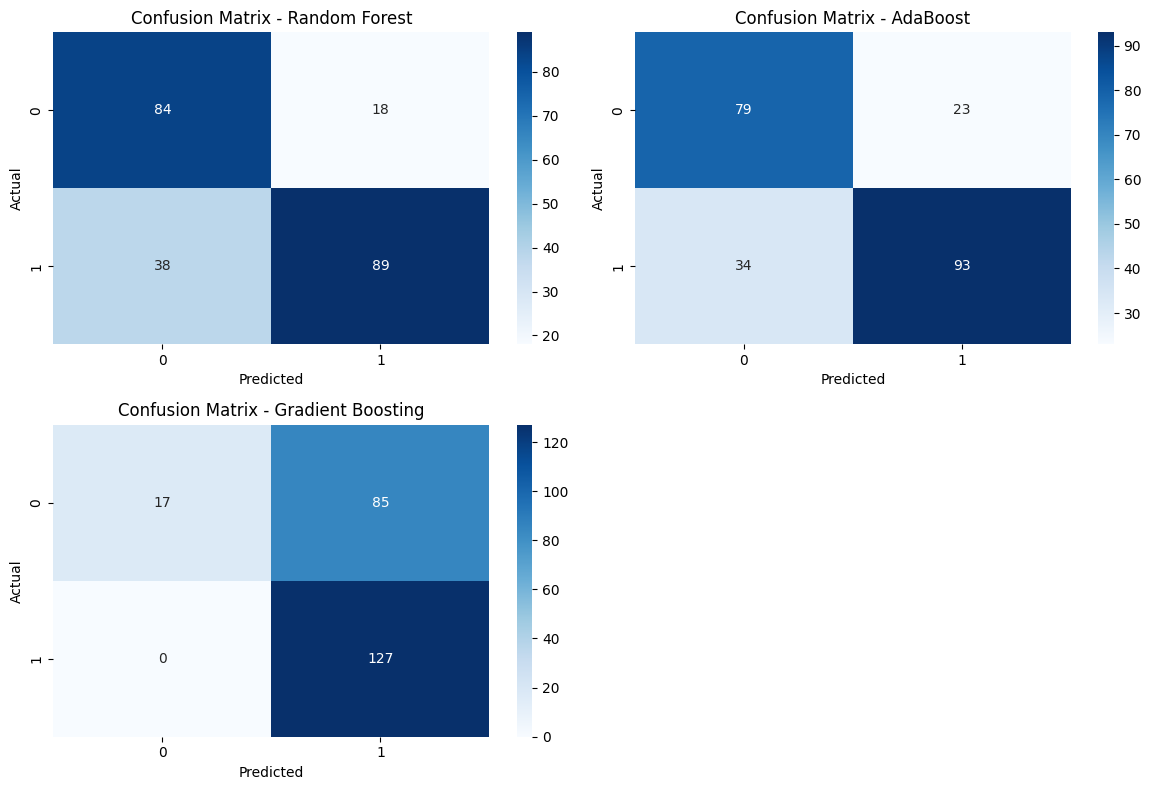

In [159]:
# ChatGPT Code: Write code to get Confusion Matrices for Adaboost, GradientBoosting and RandomForest classification
 
rf = RandomForestClassifier(n_estimators=100, max_depth=5)
ada = AdaBoostClassifierMulticlass(n_estimators=15)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)

models = {'Random Forest': rf, 'AdaBoost': ada, 'Gradient Boosting': gb}
confusion_matrices = {}

for name, model in models.items():
    model.fit(X_train_wine, y_train_wine)
    y_pred = model.predict(X_test_wine)
    misclassified_indices = (y_test_wine != y_pred).nonzero()[0]

    confusion_matrices[name] = confusion_matrix(y_test_wine, y_pred)

plt.figure(figsize=(12, 8))

for i, (name, matrix) in enumerate(confusion_matrices.items(), 1):
    plt.subplot(2, 2, i)
    sns.heatmap(matrix, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

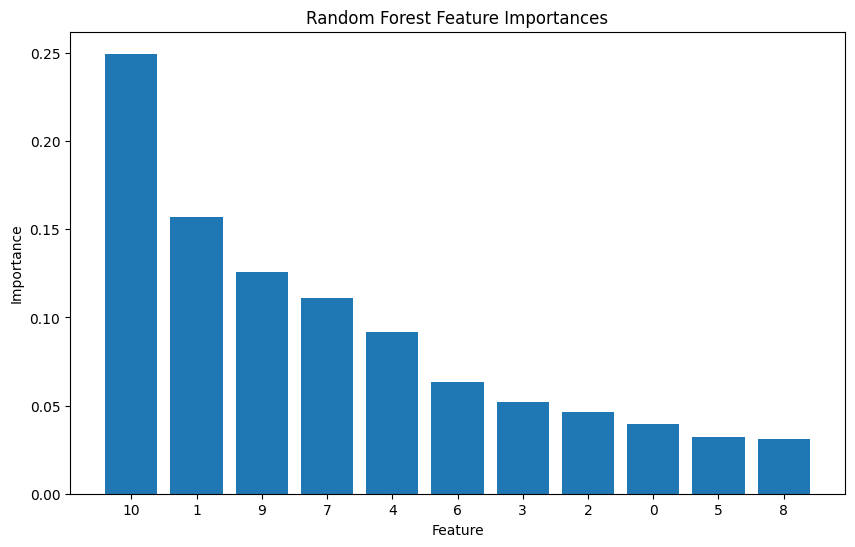

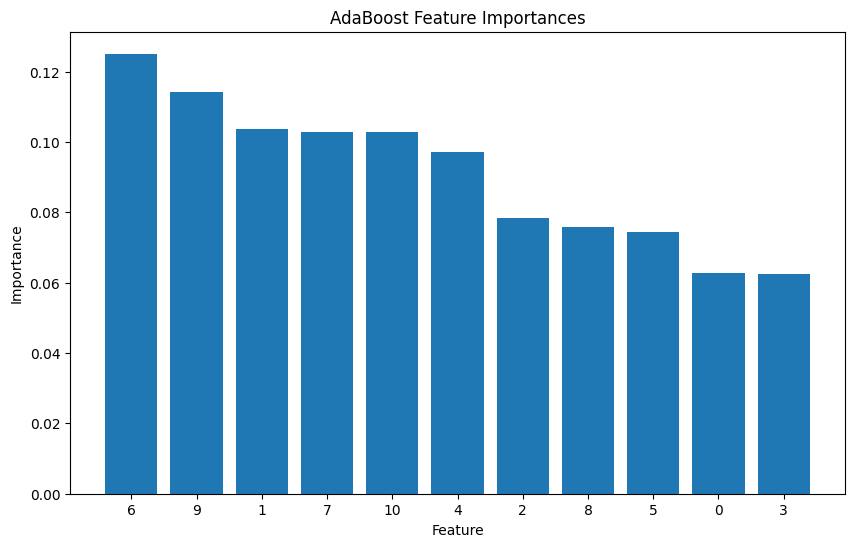

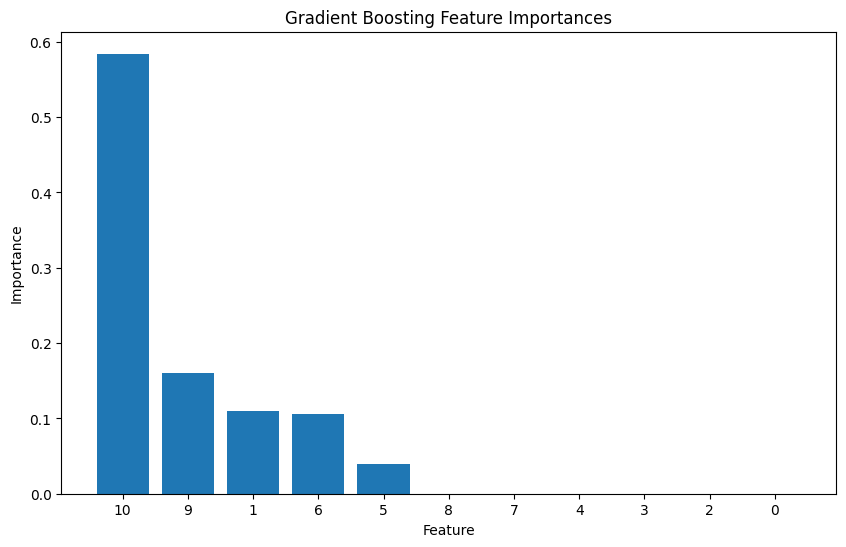

In [160]:
# ChatGPT Code: Write code to get Feature Importances for Adaboost, GradientBoosting and RandomForest classification and plot them

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_wine, y_train_wine)

importances = rf.calculate_feature_importance(X_train_wine, y_train_wine)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importances")
plt.bar(range(X_train_wine.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_wine.shape[1]), indices)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

adaboost = AdaBoostClassifierMulticlass(n_estimators=100)
adaboost.fit(X_train_wine, y_train_wine)

importances = adaboost.calculate_feature_importance()
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("AdaBoost Feature Importances")
plt.bar(range(X_train_wine.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_wine.shape[1]), indices)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01)
gb.fit(X_train_wine, y_train_wine)

importances = gb.calculate_feature_importance(X_train_wine)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Gradient Boosting Feature Importances")
plt.bar(range(X_train_wine.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_wine.shape[1]), indices)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

# Classification Model Analysis:

## Key Observations:

### Confusion Matrix:

##### 1. By examining the matrix, we can see where the model is making mistakes. For instance, if there are many false positives (FP), the model might be too lenient in predicting certain classes. If false negatives (FN) are prevalent, the model might be missing certain patterns or features.
##### 2. By knowing the type and quantity of misclassifications, we can assess the severity of the errors. Some misclassifications might be more critical than others, and understanding the distribution of these errors can help in prioritizing improvements.

## Feature Importance:

##### Features are selected based on their importance scores. The higher the importance, the more influence the feature has on the model's predictions. This analysis focuses on the top features, providing a more concise view of the most influential features for misclassifications.

### Interpretation:
##### Consistent Patterns: The histograms for feature importances across classifiers are similar, it indicates a consistent pattern in how a feature contributes to misclassifications. This consistency may suggest that the classifiers share similarities in how they handle certain features.

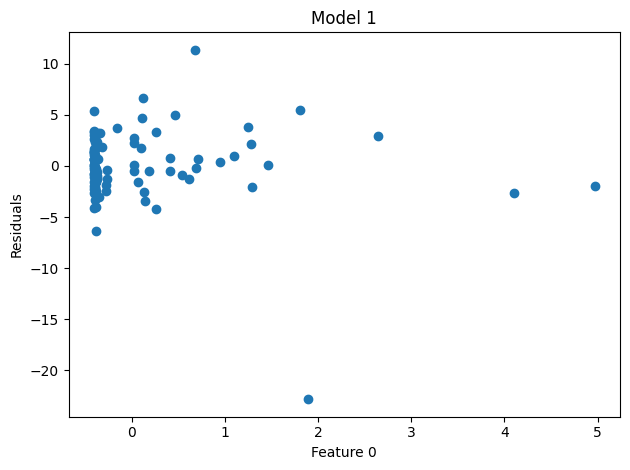

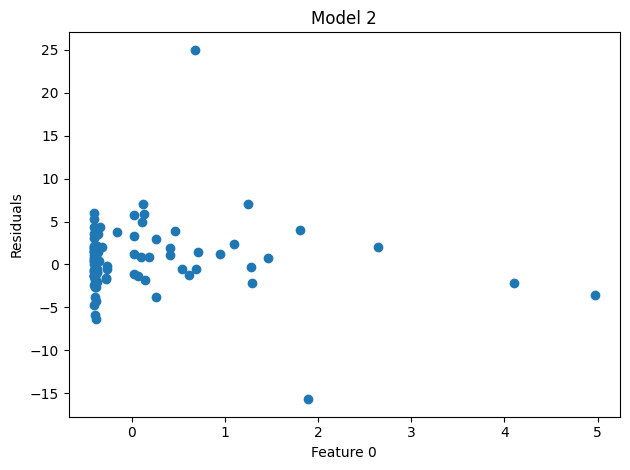

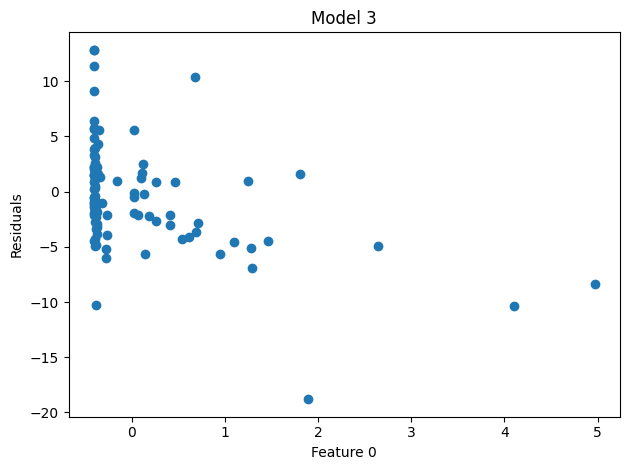

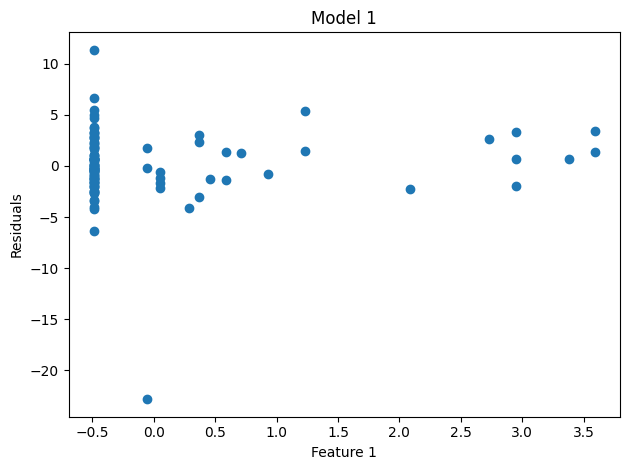

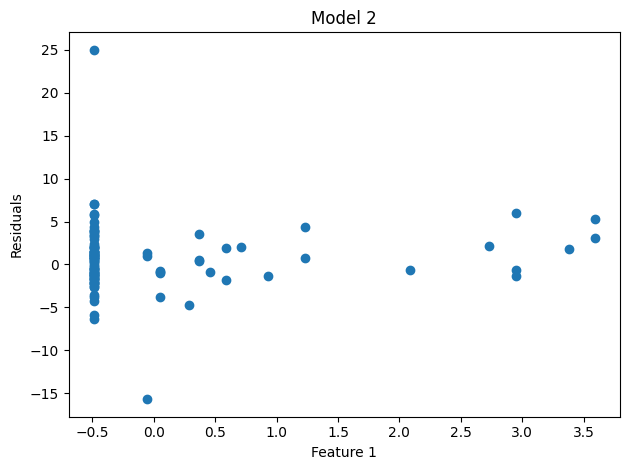

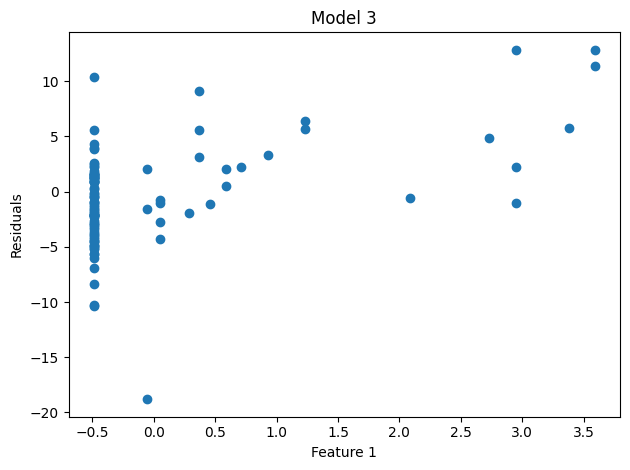

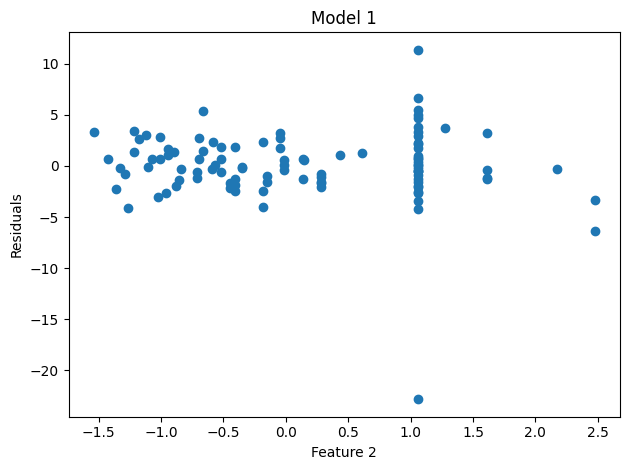

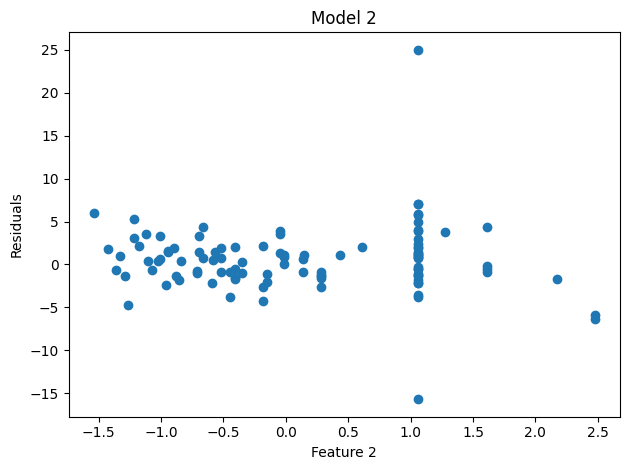

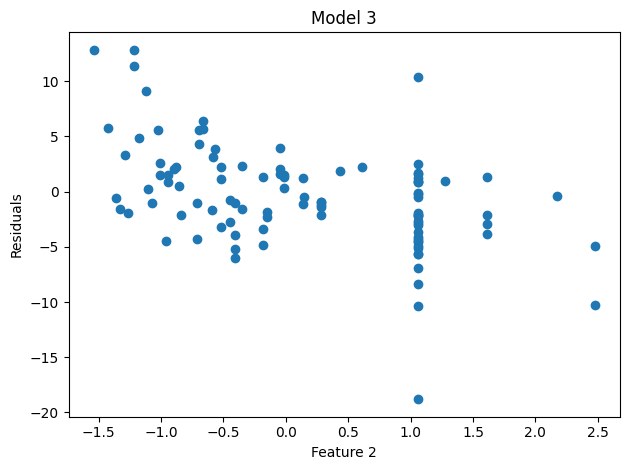

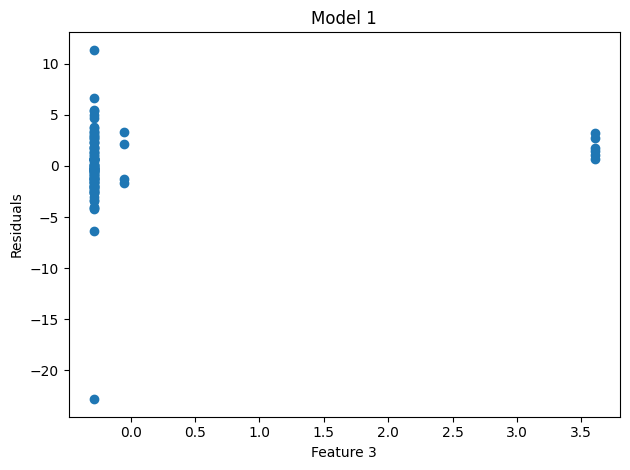

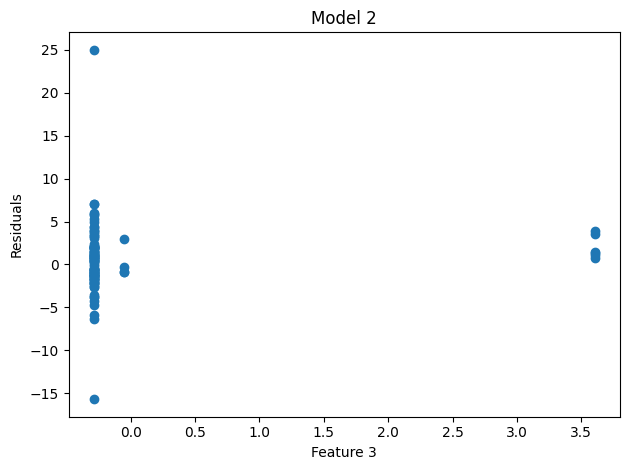

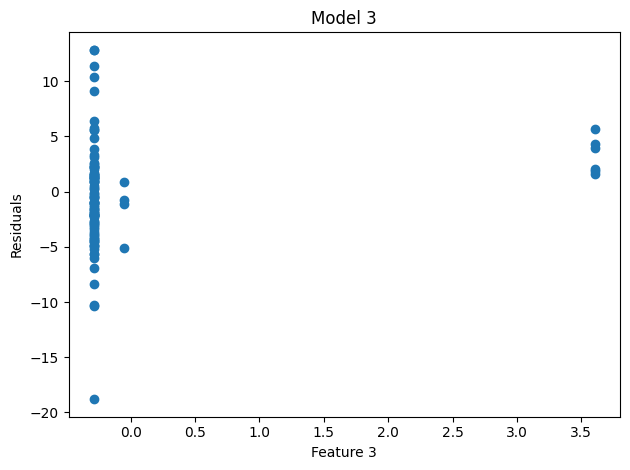

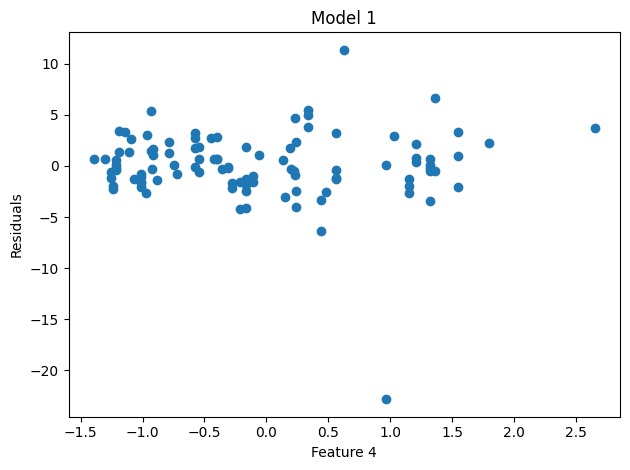

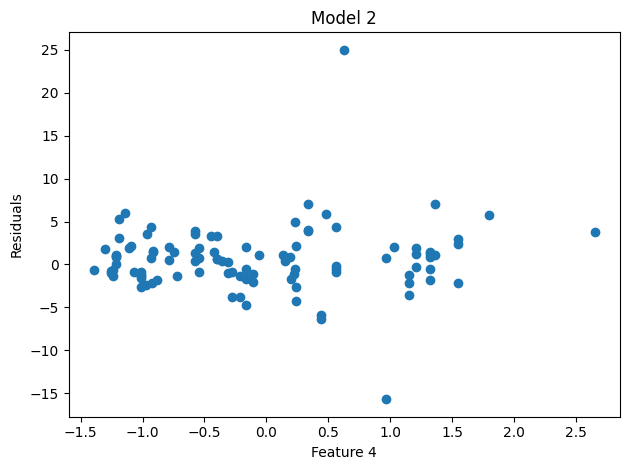

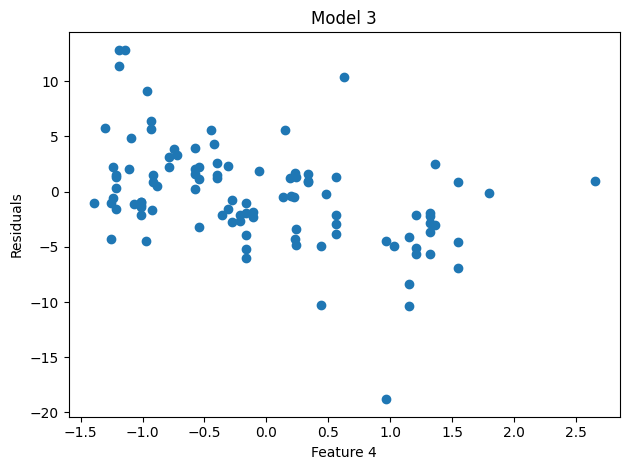

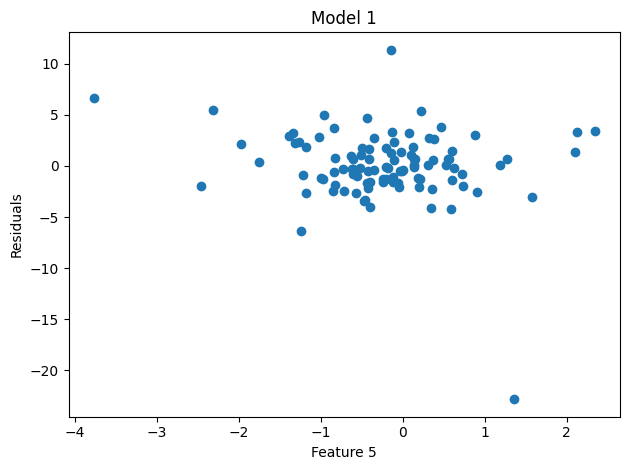

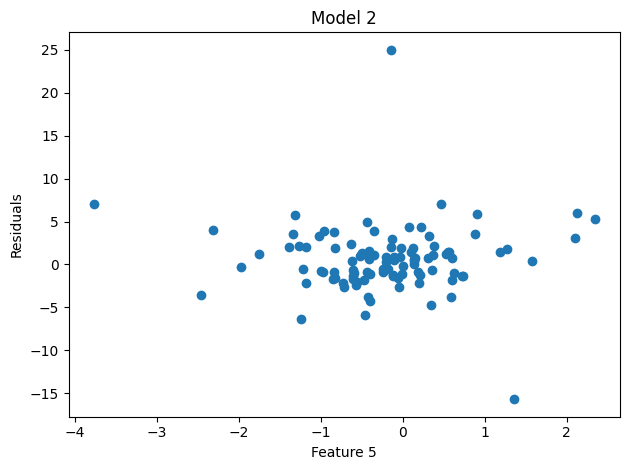

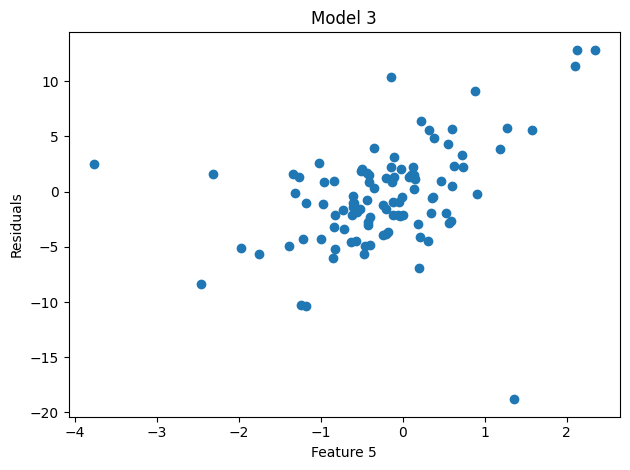

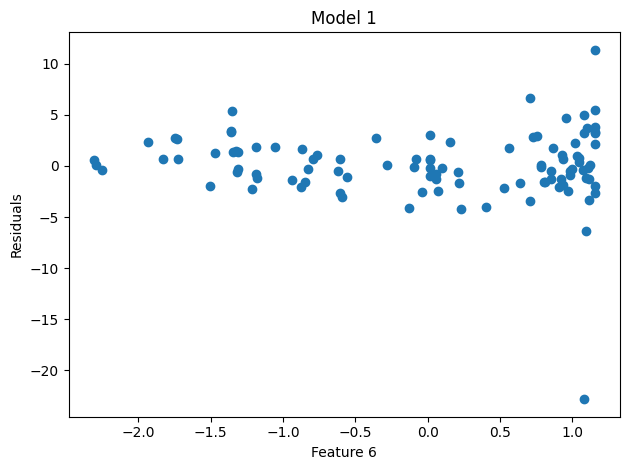

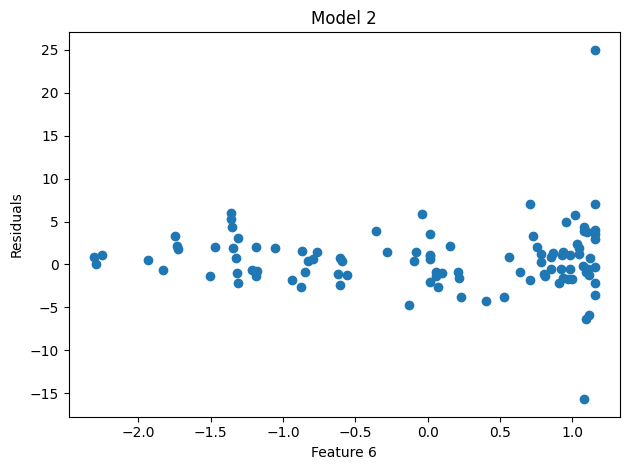

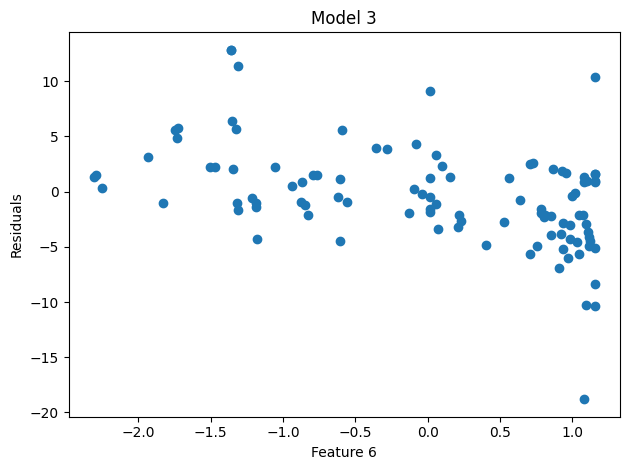

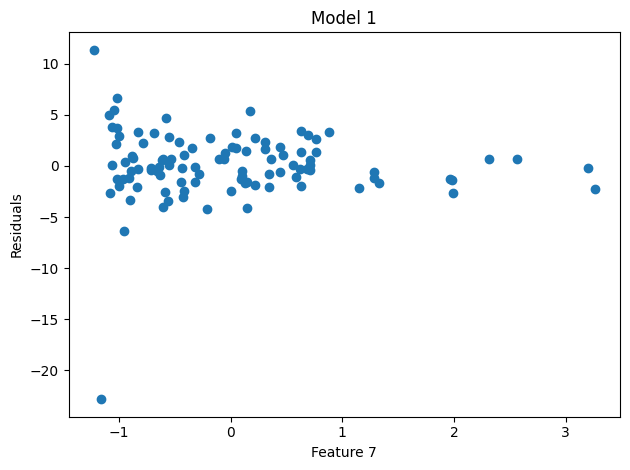

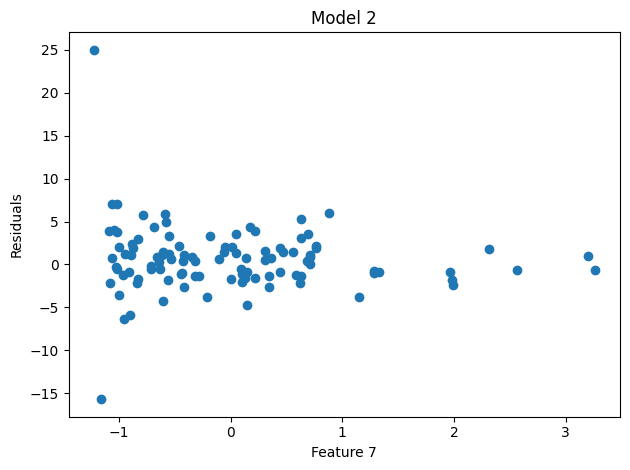

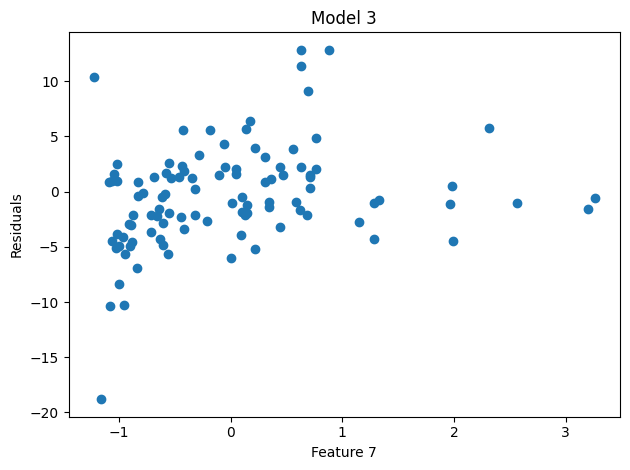

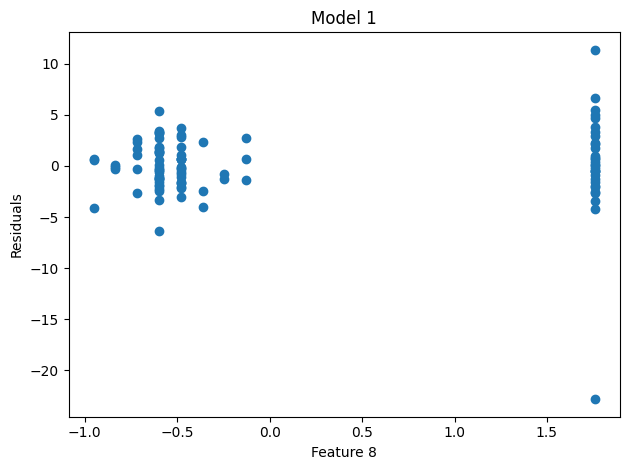

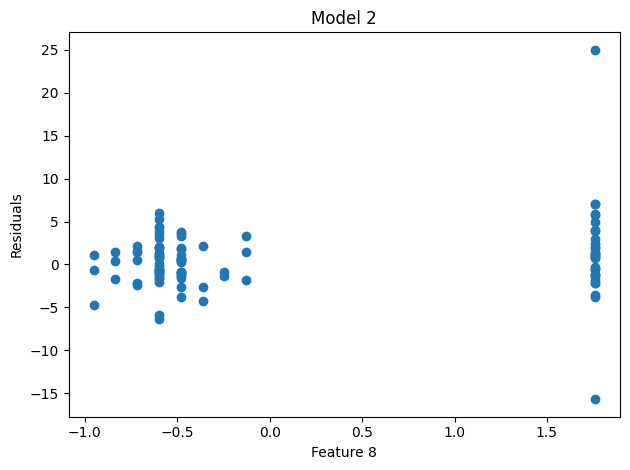

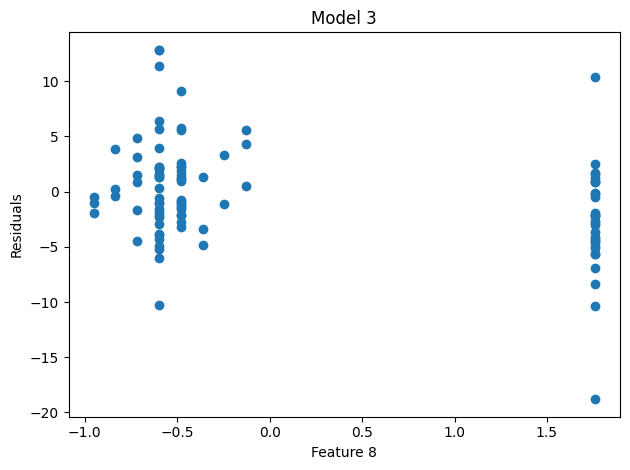

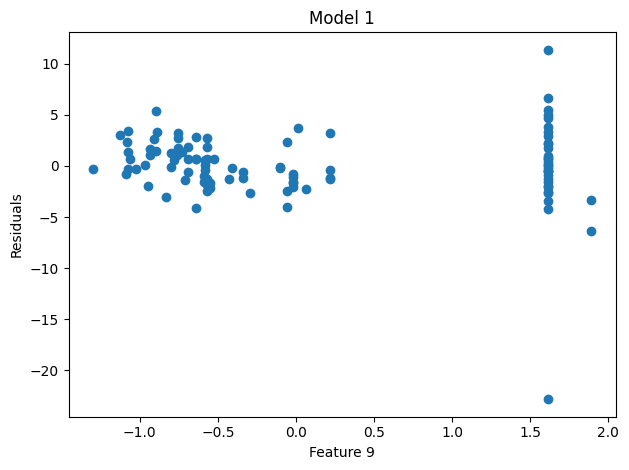

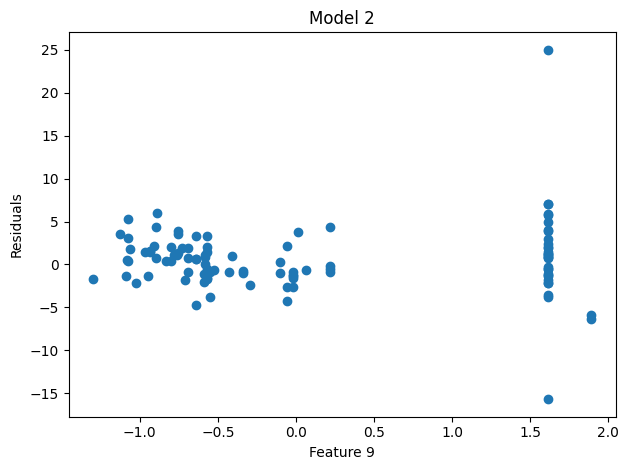

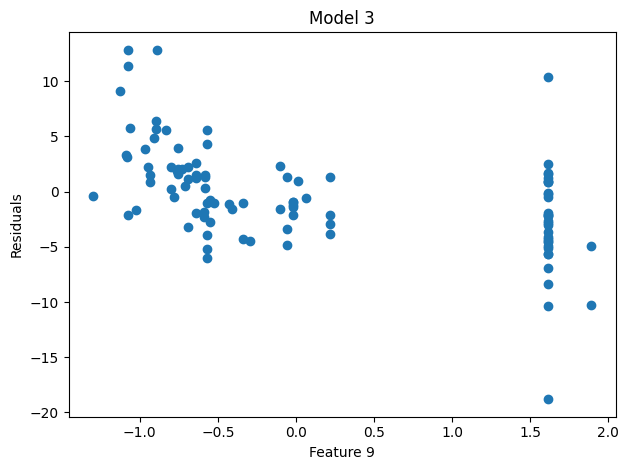

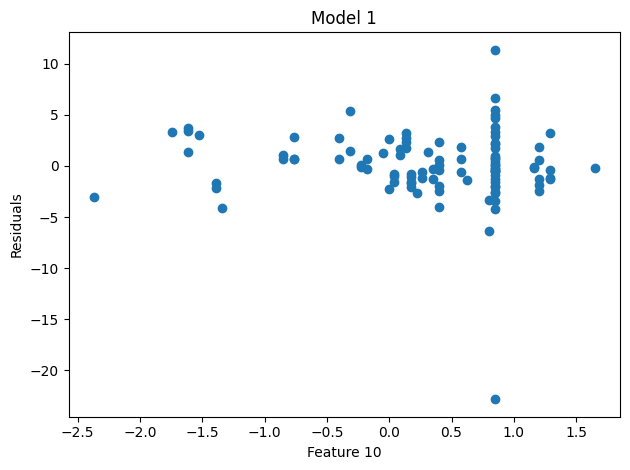

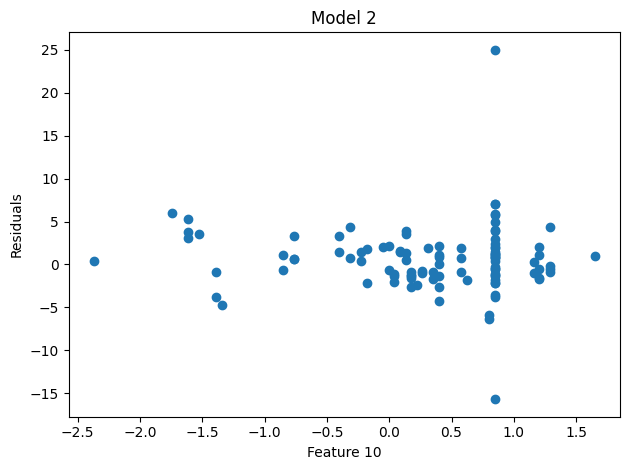

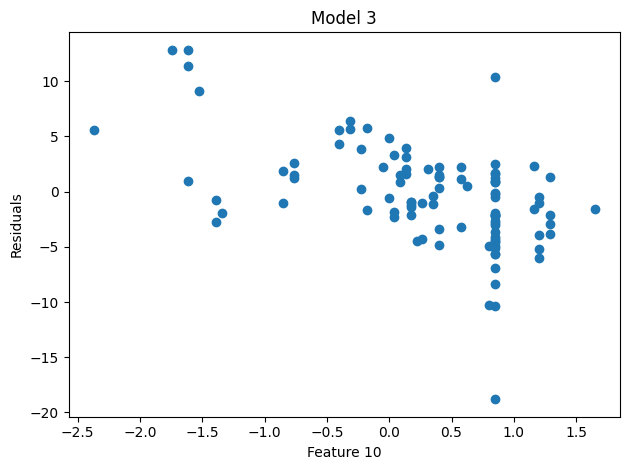

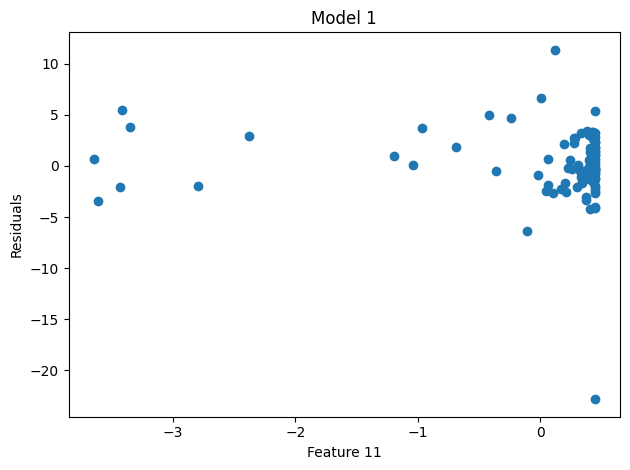

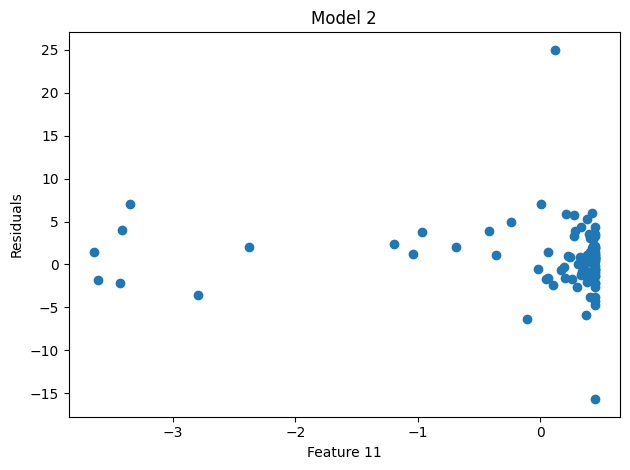

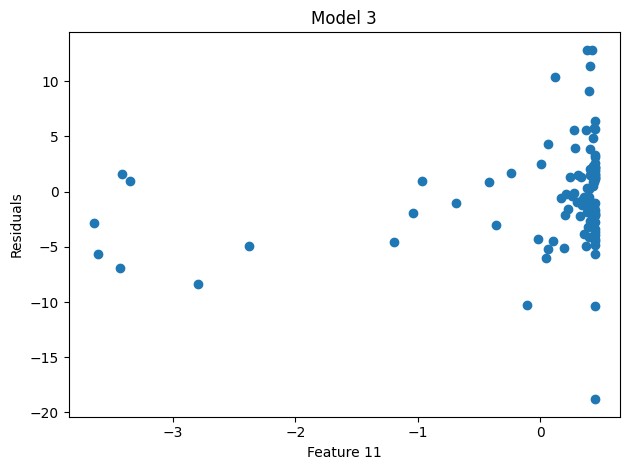

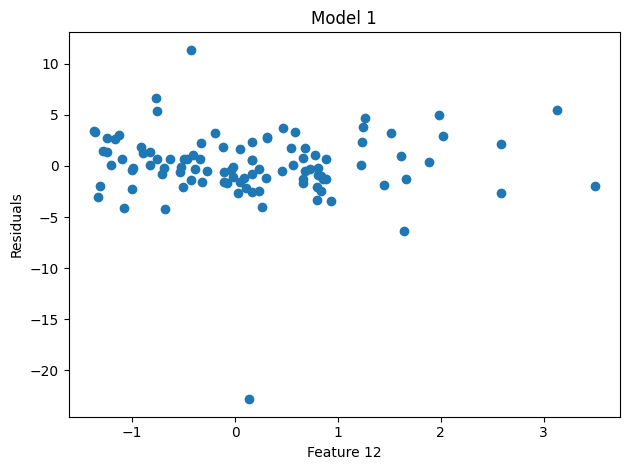

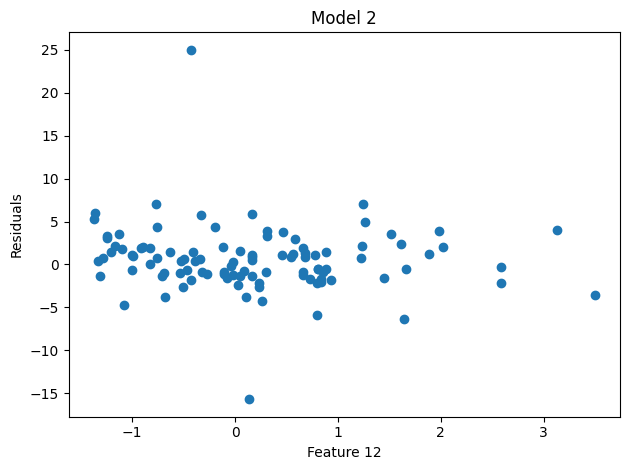

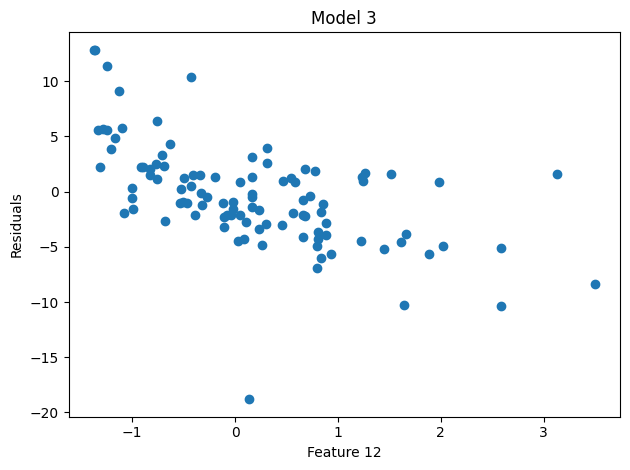

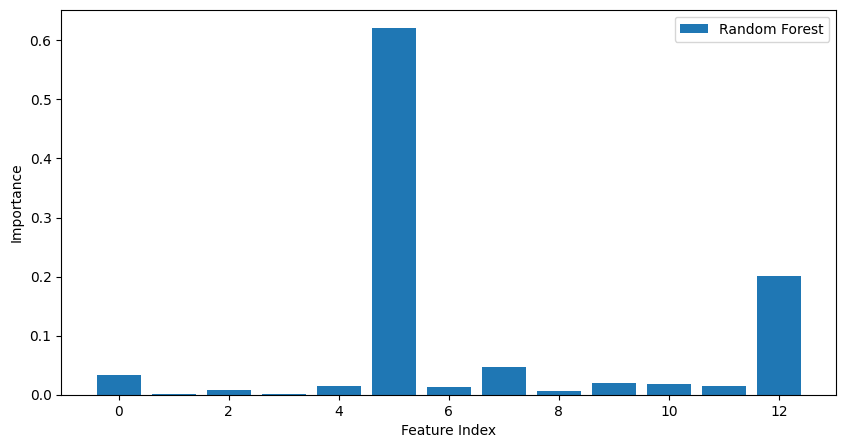

[]

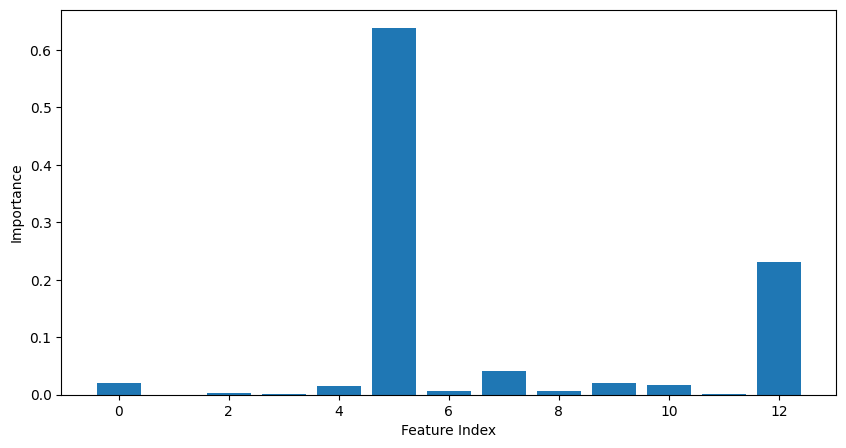

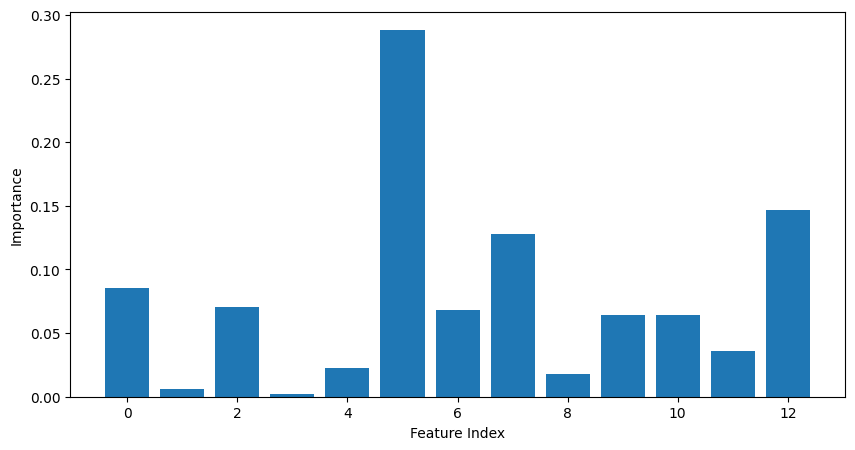

In [158]:
# ChagtGPT Code: How to do feature_similarity of mistakes analysis for regression of gradientboost,adaboost and randomforest? Write code.

rf = RandomForestRegression(n_estimators=100)
rf.fit(X_train_housing, y_train_housing)

ab = AdaBoostRegressor(n_estimators=100)
ab.fit(X_train_housing, y_train_housing)

gb = GradientBoostingRegressor(n_estimators=100,learning_rate=0.01)
gb.fit(X_train_housing, y_train_housing)

# Make predictions
predictions_rf = rf.predict(X_test_housing)
predictions_ab = ab.predict(X_test_housing)
predictions_gb = gb.predict(X_test_housing)

# Calculate residuals
residuals_rf = y_test_housing - predictions_rf
residuals_ab = y_test_housing - predictions_ab
residuals_gb = y_test_housing - predictions_gb

# Visualize the relationship between errors and features
# fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for j in range(13):
    for i, residuals in enumerate([residuals_rf, residuals_ab, residuals_gb]):
        plt.scatter(X_test_housing[:, j], residuals)
        plt.xlabel('Feature ' + f"{j}")
        plt.ylabel('Residuals')
        plt.title(f"Model {i + 1}")
        plt.tight_layout()
        plt.show()

# plt.tight_layout()
# plt.show()
plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(rf.get_feature_importance(X_train_housing, y_train_housing))), rf.get_feature_importance(X_train_housing, y_train_housing)/100 , label='Random Forest')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(gb.get_feature_importance(X_train_housing))), gb.get_feature_importance(X_train_housing), label='Gradient Boosting')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.plot()

plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(ab.get_feature_importance())), ab.get_feature_importance(), label='Adaboost Boosting')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.plot()

# Regression Model Analysis

### Feature Importances

#### Similar Feature Importance Patterns
- The feature importance plots for Random Forest, AdaBoost, and Gradient Boosting are roughly similar.
- Feature 5 has the highest importance across all three models, indicating its significant impact on predictions.
- Features 12 and 7 follow as the next important features.

#### Consistency Across Models
- Consistent appearance of features in the top importance list suggests their robust contribution to predictive performance.
- Consistency in feature importance across models indicates their relevance for predicting the target variable.

### Analysis and Interpretation

#### Feature 5 Significance
- High importance of Feature 5 implies strong influence on the target variable.

#### Consistent Feature Importance
- Consistency in feature importance across models strengthens evidence of their importance.
- Consistency increases confidence in the relevance of identified important features.

#### Common Mistakes
- Analysis of common mistakes across models can provide insights into instances where all models struggle.